@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/ZGoj3BEk4HA

# Regresión Cuantílica

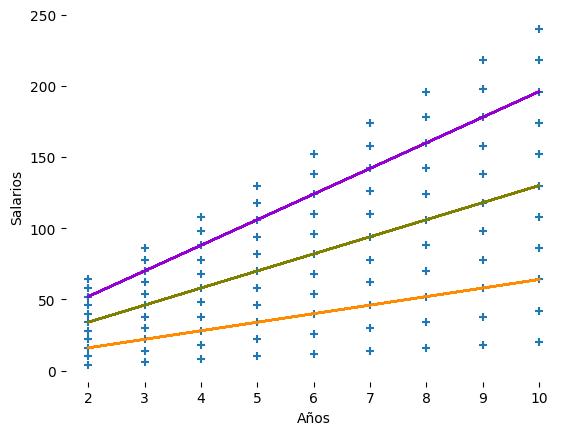

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

# Generación de datos sintéticos con diferentes pendientes (m) e interceptos (b)
anios = []
salarios = []
m = 2
for b in range(0, 21, 2):
    for x in range(2, 11):
        anios.append(x)
        salarios.append(m*x + b)
    m += 2
datos = pd.DataFrame({"anios" : anios, "salarios" : salarios})

# Inicialización del modelo con los datos sintéticos
modelo = sm.quantreg("salarios ~ anios", data=datos)

# Creando los modelos para diferentes cuantiles
modelo_cuantil_0_20 = modelo.fit(q=0.20)
modelo_cuantil_0_50 = modelo.fit(q=0.50)
modelo_cuantil_0_80 = modelo.fit(q=0.80)

# Visualización de los datos y de los modelos
plt.figure()
plt.scatter(datos["anios"], datos["salarios"], marker="+")
plt.plot(datos["anios"], modelo_cuantil_0_20.predict(), color="darkorange")
plt.plot(datos["anios"], modelo_cuantil_0_50.predict(), color="olive")
plt.plot(datos["anios"], modelo_cuantil_0_80.predict(), color="darkviolet")
plt.xlabel("Años")
plt.ylabel("Salarios")
plt.box(False)
plt.show()